In [1]:
import pandas as pd

In [2]:
combined = pd.read_csv('../data/Combined_News_DJIA.csv')
news = pd.read_csv('../data/RedditNews.csv')
market = pd.read_csv('../data/upload_DJIA_table.csv')

In [3]:
print(combined.shape)
combined.head(1)

(1989, 27)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""


In [4]:
# Remove 'b'-prefixes
# Applymap -> Like .apply() but Applied to Entire DF
combined = combined.applymap(lambda cell: cell.strip() if type(cell)==str else cell)
combined = combined.applymap(lambda cell: cell.lstrip('b"') if type(cell)==str else cell)
combined.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,'BREAKING: Musharraf to be impeached.','Russia Today: Columns of troops roll into Sou...,'Russian tanks are moving towards the capital ...,"Afghan children raped with 'impunity,' U.N. of...",'150 Russian tanks have entered South Ossetia ...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,...,'Georgia Invades South Ossetia - if Russia get...,'Al-Qaeda Faces Islamist Backlash',"'Condoleezza Rice: ""The US would not act to pr...",'This is a busy day: The European Union has a...,"Georgia will withdraw 1,000 soldiers from Iraq...",'Why the Pentagon Thinks Attacking Iran is a B...,'Caucasus in crisis: Georgia invades South Oss...,'Indian shoe manufactory - And again in a ser...,'Visitors Suffering from Mental Illnesses Bann...,"No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,'Why wont America and Nato help us? If they wo...,'Bush puts foot down on Georgian conflict',Jewish Georgian minister: Thanks to Israeli tr...,'Georgian army flees in disarray as Russians a...,"Olympic opening ceremony fireworks 'faked'""",'What were the Mossad with fraudulent New Zeal...,'Russia angered by Israeli military sale to Ge...,'An American citizen living in S.Ossetia blame...,...,'Israel and the US behind the Georgian aggress...,"'""Do not believe TV, neither Russian nor Georg...",'Riots are still going on in Montreal (Canada)...,'China to overtake US as largest manufacturer','War in South Ossetia [PICS]','Israeli Physicians Group Condemns State Torture',' Russia has just beaten the United States ove...,'Perhaps *the* question about the Georgia - Ru...,'Russia is so much better at war',So this is what it's come to: trading sex for ...


In [5]:
# Sample Corpus from Combined DF
# -- Includes Only Top1 Headlines
corpus = combined[['Date', 'Label', 'Top1']]
print(corpus.shape)
corpus.head(3)

(1989, 3)


,Date,Label,Top1
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...
1,2008-08-11,1,'Why wont America and Nato help us? If they wo...
2,2008-08-12,0,'Remember that adorable 9-year-old who sang at...


In [6]:
# We will create a document-term matrix using a bag-of-words approach.

#### document-term matrix =
- each **col** represents a word and
- each **row** represents a documnent
- the value in every cell can represent things:
    - Most traditionally, it is a count of how many times a word appears in a doc.
    - It can also be a boolean, does this word appear at all.
    - TF-IDF: term-frequency inverse document-frequency

#### Bag of Words = Counting the Appearance of Words to try to predict something.
Bag of words can be good for classification problems.
- Why is bag of words good for classification?

In [7]:
import spacy

# load NN sm, md, lg etc.
nlp = spacy.load("en_core_web_lg")

In [8]:
tokens = []

# Tokenize Corpus
for doc in nlp.pipe(corpus['Top1'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False) & (token.is_space == False):
            doc_tokens.append(token.text.lower())
        
    tokens.append(doc_tokens)

# Create New Tokens Column in Corpus DF     
corpus.insert(3, 'tokens', tokens)

In [9]:
corpus.head(2)

,Date,Label,Top1,tokens
0,2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,"[georgia, downs, russian, warplanes, countries..."
1,2008-08-11,1,'Why wont America and Nato help us? If they wo...,"[wo, nt, america, nato, help, wo, nt, help, he..."


## But... we **won't be using Tokenization** with the Vectorizors

### Count Vectorizor
#### Vectorizor does NOT mean Word Embeddings
-> Vectorizor are things that build Document Term Matricies
- One of 3 BOW methods

In [10]:
# Building a Document Term Matrix

from sklearn.feature_extraction.text import CountVectorizer

# --- Key Arguments/Parameters for Count Vectorizor ---
# max_features -> sets limit on vocabulary size aka Limit Features
# - Only most common words are made into features.
# max_df/min_df -> Limit Features by Document Frequency 
# -> Ignores terms that show up in greater than 90% of docs
# --> Or less than 2% of docs for example
# ngram_range -> range of n-values for different n-gram
# or char n-grams to be extracted
# You can also override scikit-learn's default tokenization.
# Scikit-learns default tokenization is not as good as spaCy's.

# Instantiate the Transformer
vect = CountVectorizer(stop_words=nlp.Defaults.stop_words, 
                       max_features=1000)


# Build Vocab
# We simply pass an iterable of docs...
# It 'tokenizes on its own...'
# AKA it Builds the Vocab on its own
# Tokenization -> One way to Build Vocab I think...

# ?- Can this be improved using lemmitization? -?
vect.fit(corpus['Top1'])

# transform text - Count Vocab
# Build the Matrix Using the Vocab Determined during the fit Command
dtm = vect.transform(corpus['Top1'])

/Users/taylorcurran/prj/predicting-market/venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [11]:
# Print Out Words in Vocabulary
print(vect.get_feature_names()[0:50])

['000', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '1st', '20', '200', '2000', '2003', '2012', '2014', '2022', '22', '23', '25', '30', '300', '33', '35', '40', '400', '45', '50', '500', '60', '70', '90', 'abuse', 'access', 'according', 'account', 'accounts', 'accused', 'act', 'acta', 'action', 'actions', 'activist', 'actually', 'admits', 'afghan', 'afghanistan']


In [12]:
# The DTM is Values and their Location in Coordinates
print('Type:', type(dtm))
print('Shape:', dtm.shape)
print('First 2 Values:')
print(dtm[2]) # These are coordinates of the matrix :)

Type: <class 'scipy.sparse.csr.csr_matrix'>
Shape: (1989, 1000)
First 2 Values:
  (0, 628)	1
  (0, 991)	1


In [13]:
# dtm sparce to df
# Get Word Counts for Each Document
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print(dtm.shape)
dtm.head()

(1989, 1000)


,000,10,100,11,12,13,14,15,16,17,...,wtf,year,years,yemen,york,young,youth,youtube,yr,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dtm.head()

,000,10,100,11,12,13,14,15,16,17,...,wtf,year,years,yemen,york,young,youth,youtube,yr,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

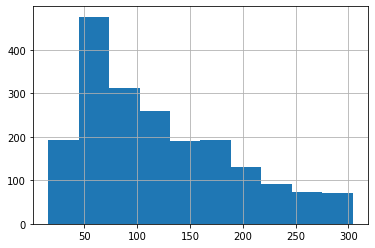

In [15]:
# Examine Distribution of Doc Lengths
# AKA Distrubution of Headline Lengths
doc_lengths = [len(doc) for doc in corpus['Top1']]
pd.Series(doc_lengths).hist()

### -> Think about it...
#### Word counts are affected by document size.
#### Enter -> TF-IDF

# TF-IDF -> Term Frequency Inverse Documnet Frequency
### Helps Control for Different Document Lengths in the Same Corpus
Term Frequency = Percentage Words in Document for each word.

Document Frequency = A penalty for the word existing in a high number of documents.

The purpose of TF-IDF is to find what is unique to each document. It penalizes the term frequencies of words that are common across all documents which will allow for each document's most different topics to rise to the top.

### Document Term Matrix with TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ?-- What percentage of overall corpus size 
# sould max_features be? --?

# Instantiate Vectorizer Object
tfidf = TfidfVectorizer(stop_words='english', max_features=2500)

# Create a vocabulary and get word counts per document.
# Similar to fit_predict
dtm = tfidf.fit_transform(corpus['Top1'])

# Print Word Counts

# Get feature names to use as dataframe column headers.
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(1989, 2500)


,000,10,100,1000,11,12,120,13,14,15,...,yesterday,york,young,youngest,youth,youtube,yr,zealand,zero,zones
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### We want to trim down our DTM by reducing noise while improving signal.
#### We will use spaCy tokenization, stop-words, n-grams, and statistical trimming to help us refine the results of our dtm.

In [17]:
def tokenize(document):
    # Return Lemmas
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [18]:
# n-grams = multi-word phrases
# bi-gram = 2 words
# tri-gram = 3 words
# sklearn will search through all the valid combinations of words
# and return all those possible phrases as they appear in text....
# This results in WAYYY more words in a vocabulary as you have all the words
# singular ANDDD the words as combinations SO...
# When specifying ngram_range -> ALWAYS limit the features!
print(len(corpus['Top1']))

1989


In [19]:
# NOTE
# Tunning Parameters

# Instantiate Vectorizor Object
tfidf = TfidfVectorizer(stop_words='english',
                       ngram_range=(1, 2),
                # Term or N-Gram Must Appear in no more than 97 docs.
                       max_df=97,
                # Term or N-Gram Must Appear in at least 3 Docs
                       min_df=4,
                       max_features=2000,
                # spaCy Tokenization from Func above
                       tokenizer=tokenize)

# Create a Vocabulary and Get Word Counts per Document
dtm = tfidf.fit_transform(corpus['Top1']) # Similar to Fit-Predict

# Print Word Counts

# Get Feature Names to Use ad DF Column Headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(1989, 1534)


,$,$ 100,+,1,1.8,10,10 year,"10,000",100,"100,000",...,year prison,yemen,york,young,youth,youtube,zealand,zone,|,| world
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [20]:
# Calculate Distance of TF-IDF Vectors
# cosine similarity == the idea of measuring the Euclidian (straight-line)
# distance between two points and normalizing this
# cosine similarity == normalization of euclidean distance

from sklearn.metrics.pairwise import cosine_similarity

# We are finding the distance between each document's TF-IDF vector
dist_matrix = cosine_similarity(dtm)



In [21]:
# Let's find a headline similar to the first row of Top1.
corpus['Top1'][0]

'Georgia \'downs two Russian warplanes\' as countries move to brink of war"'

In [22]:
# Turn the Dist Matrix into a Dataframe
dist = pd.DataFrame(dist_matrix)

# Similarity Accross DF
print(dist.shape)
dist.head()

(1989, 1989)


,0,1,2,3,4,5,6,7,8,9,...,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988
0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,1.0,0.0,0.0,0.184994,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.126537
3,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071614,0.000000


In [23]:
# Each row in the similarity of one document to all other documents.
dist[0][0:15]

0     1.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.111051
11    0.000000
12    0.000000
13    0.000000
14    0.494323
Name: 0, dtype: float64

In [58]:
# Reccomendation Engine

# Find all rows that are not 1 (aka, identical to headline)
# Orderthem by most similar.
dist[dist[11] < 1][11].sort_values(ascending=False).index[0]

848

In [54]:
# We can see the similarity.
print(corpus['Top1'][11])
print(' ')
print(corpus['Top1'][848])

N Korea's Kim died in 2003; replaced by lookalike, says Waseda professor"
 
North Korea Leader Kim-Jong Il has died


In [59]:
def find_top_similarity(index_value):
    print(corpus['Top1'][index_value])
    # Find all rows that are not 1 (aka, identical to headline)
    # Orderthem by most similar -> Get Top One
    similar = dist[dist[index_value] < 1]\
              [index_value].sort_values(ascending=False).index[0]
    print('\n')
    print(corpus['Top1'][similar])

In [61]:
find_top_similarity(20)

'A French judge has ordered two branches of Scientologists and their leaders to stand trial for fraud '


Airliner crashes in French Alps


#### Cosine Similarity is too computationally expensive to work in the majority of situations

Besides cosine similarity euclidian distance there are 2 main ways to store similarity:

- KD Trees
- Ball Trees

These are alternatives to storing the distance between every combination of vectors.

In [26]:
# Document Term Matrix with TF-IDF as Values
print(dtm.shape)
dtm.head(3)

(1989, 1534)


,$,$ 100,+,1,1.8,10,10 year,"10,000",100,"100,000",...,year prison,yemen,york,young,youth,youtube,zealand,zone,|,| world
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
# Specify we want 5 neighbors per doc
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree')

In [28]:
dtm.iloc[0]

$          0.0
$ 100      0.0
+          0.0
1          0.0
1.8        0.0
          ... 
youtube    0.0
zealand    0.0
zone       0.0
|          0.0
| world    0.0
Name: 0, Length: 1534, dtype: float64

In [29]:
# We pass our model a doc vector to get the model to point us to it's 
# K- Nearest Neighbors
nn.kneighbors([dtm.iloc[0]])

(array([[0., 1., 1., 1., 1.]]), array([[  0, 606, 152, 205, 385]]))

In [30]:
# Query Using Kneighbors
nn.kneighbors([dtm.iloc[14]])

(array([[0., 1., 1., 1., 1.]]), array([[ 14, 606, 152, 205, 385]]))

In [31]:
corpus['Top1'][14]

'Military help for Georgia is a \'declaration of war\', says Moscow"'

In [32]:
# Looks Like Euclidean distance was more effective...
print(corpus['Top1'][14])
print(' ')
print(corpus['Top1'][606])
print(' ')
print(corpus['Top1'][385])

Military help for Georgia is a 'declaration of war', says Moscow"
 
Punjab(Pakistan) governor Salman Taseer assassinated in Islamabad
 
'What a surprise...'


In [33]:
# Let's try again with a random number:
from numpy import random

randint = random.randint(len(corpus['Top1']))
print("Random Integer", randint, "\n")
kneighbors_query = nn.kneighbors([dtm.iloc[randint]])
print(kneighbors_query, "\n")
print(corpus['Top1'][randint], "\n")
print(corpus['Top1'][kneighbors_query[1][0][1]], "\n")
print(corpus['Top1'][kneighbors_query[1][0][2]])

# From seeing a few examples I get the sense that the system is biased
# towards shorter headlines... I wonder why??
# ?-- TODO --? The Following Show Up Disproportionately:
# 'What a surprise...' [385]
# 'Scenes from the recession' [152]
# 'June 4th, 1989' [205]

Random Integer 1982 

(array([[0., 1., 1., 1., 1.]]), array([[1982, 1472,  606,  152,  205]])) 

Today The United Kingdom decides whether to remain in the European Union, or leave 

Michael Schumacher out of Coma 

Punjab(Pakistan) governor Salman Taseer assassinated in Islamabad


### Making a match with an outside text source.

In [34]:
new_doc = ["There is a New President."]

In [35]:
# Query for Sim of Random Doc to Our Reddit Headlines
# Create a DTM Row (With TDIF Values) for the new doc.
# -> Relative the Reddit Headline Corpus
new = tfidf.transform(new_doc)
new # LOOK -> Only 2 stored elements! Only 2 words from the sample new doc are
    # included in the Term Set.. a good indicator that this headline might not
    # work as well with the present model.

<1x1534 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

We could decide on a threshold for `number of stored_elements` under-which we refuse to provide a reccomendation in order to reduce the amount of impractical, inaccurate results.

In [36]:
# Turn the Sparse Matrix into a Dense Matrix
new = new.todense()

In [37]:
# Now we have a new doc/row that is expressed in a dense TF-IDF Term Vector
# and we are going to plug that row into our KNN model to get an output of our
# K- nearest neighbors
nn.kneighbors(new)

(array([[0.98509509, 1.        , 1.        , 1.        , 1.        ]]),
 array([[ 192,  385,  205, 1472,  152]]))

In [38]:
corpus['Top1'][192]

'\'"I was murdered by president Alvaro Colom"\''

The limitation exists in that... docs that have few tokens that are included in the vocabulary of the Doc-Term Matrix will be extra sparse (aka. many zeros).
--> Other vectors that also contain a high proportion of zeros will be identified by the KNN model as 'similar', even though the only similarity the 2 docs have in common is thier lack of tokens that are a part of the term set. --> Thats why the KNN model might be biased to favor shorter headlines when comparing a headline that does not include many high TF-IDF values.

How would JC set a distance threshold for recommendations from my KNN model?

1. Select a sample size of query articles.
2. Then he would get the knn recommendations for those 10 articles ~5 recommendations each.
3. For each of the 50 recs, he would label them as useful or not useful.
4. Take one of the following values as the threshold:
    - Max Distance of the Useful Labelled recs
    - 75% percentile distance of the use labelled recs
    - Min of the not useful labelled recs

Then after he has his model in production, he would run a similar experiment using A/B testing.

### Word Embeddings

In [39]:
nlp = spacy.load('en_core_web_lg')

doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
# ?-- How does this spaCy vector differ from the vectors of the DTM? --?
# For each term-document pair, the TF-IDF DTM ascribes only 1 TF-IDF Value
# ?-- In this case we would see a matrix for each document-term pair.. 
# or a matrix for each term/token? --?
# -- SOLVED -> It is querying from a complex data-structure that represents
# the english language. The vector of a doc represents the location of the doc
# among this "english map"...
bananas_vector = doc.vector
# These values are un-interpretable.
# For ALL Docs of ANY Length, a vector of length 300 will be constructed to 
# represent said vector.
# ?-- New Question -> How are the multiple tokens that form a doc aggregated
# to always have a vector of length 300? Are they averaged? --?
print(len(bananas_vector))
print(bananas_vector[:50])

300
[ 0.20798424 -0.26089048 -0.11545725 -0.19644375 -0.00283249  0.035585
 -0.20517    -0.22737475  0.08560525  1.3689475  -0.0574125   0.080621
  0.02372751  0.11745405 -0.006531   -0.1244      0.19908676  0.63772255
  0.152917   -0.233505   -0.24091    -0.07115    -0.09107532  0.0716735
  0.11626275 -0.3913725   0.11304875 -0.2113275   0.10901908 -0.24488541
  0.03005775  0.04778558  0.07378     0.25714204  0.26258624 -0.16689749
  0.1875965  -0.012368   -0.17629975  0.111685    0.0182025   0.009865
 -0.35877    -0.2232655  -0.043772    0.3639995   0.0742955   0.12122551
  0.137013   -0.05506665]


In [41]:
from sklearn.decomposition import PCA

def get_word_vectors(words):
    # Converts a list of words into their word vectors.
    # Returns a List of Word Vectors
    return [nlp(word).vector for word in words]

words = ['car', 'truck', 'suv', 'race', 'elves', 'dragon', 'sword', 'king',
         'queen', 'prince', 'horse', 'fish', 'lion', 'tiger', 'lynx', 'potato',
         'baking', 'textbook', 'student', 'homework', 'studying', 'fear']

# Initalize pca model and tell it to project data down onto 2 dimensions.
pca = PCA(n_components=2)

# fit the pca model to our 300-D data, this will work out which is the best way
# to project the data down that will best maintain the relative distances
# between data points.
# It will store these instructions on how to transform the data.
pca.fit(get_word_vectors(words))

# Tell our (fitted) pca model to transform our 300D data down onto 2D using the
# instructions it learned during the fit phase.
word_vecs_2d = pca.transform(get_word_vectors(words))

# let's look at our new 2D word vectors
word_vecs_2d

array([[ 2.24837901,  4.64058652],
       [ 1.6698076 ,  4.5151085 ],
       [ 0.98661567,  4.70905827],
       [ 0.77894667,  1.8011122 ],
       [-1.71120742, -1.3381699 ],
       [-3.23442003, -0.56666201],
       [-2.62869424, -1.29522234],
       [ 0.54058958, -0.16888859],
       [-1.67977536, -0.58448348],
       [-2.20593549, -0.55952406],
       [-0.84751709,  1.05688777],
       [-1.01051534, -0.51156597],
       [-3.1745466 , -0.18483697],
       [-3.00263776,  0.09512922],
       [-2.51905141,  0.40474798],
       [ 0.62232175, -0.52917946],
       [ 2.5152988 , -1.64965315],
       [ 2.9285929 , -2.04525476],
       [ 3.42334013, -1.96686179],
       [ 3.47834444, -2.22727975],
       [ 2.79263995, -2.72236593],
       [ 0.02942422, -0.87268231]])

In [71]:
print("Length of Embeddings List: ", len(get_word_vectors(words)))
print("Size of Original Embedding Vector: ", len(get_word_vectors(words)[0]))
print("Size of Reduced Embedding Vector: ", len(word_vecs_2d[0]))

Length of Embeddings List:  22
Size of Original Embedding Vector:  300
Size of Reduced Embedding Vector:  2


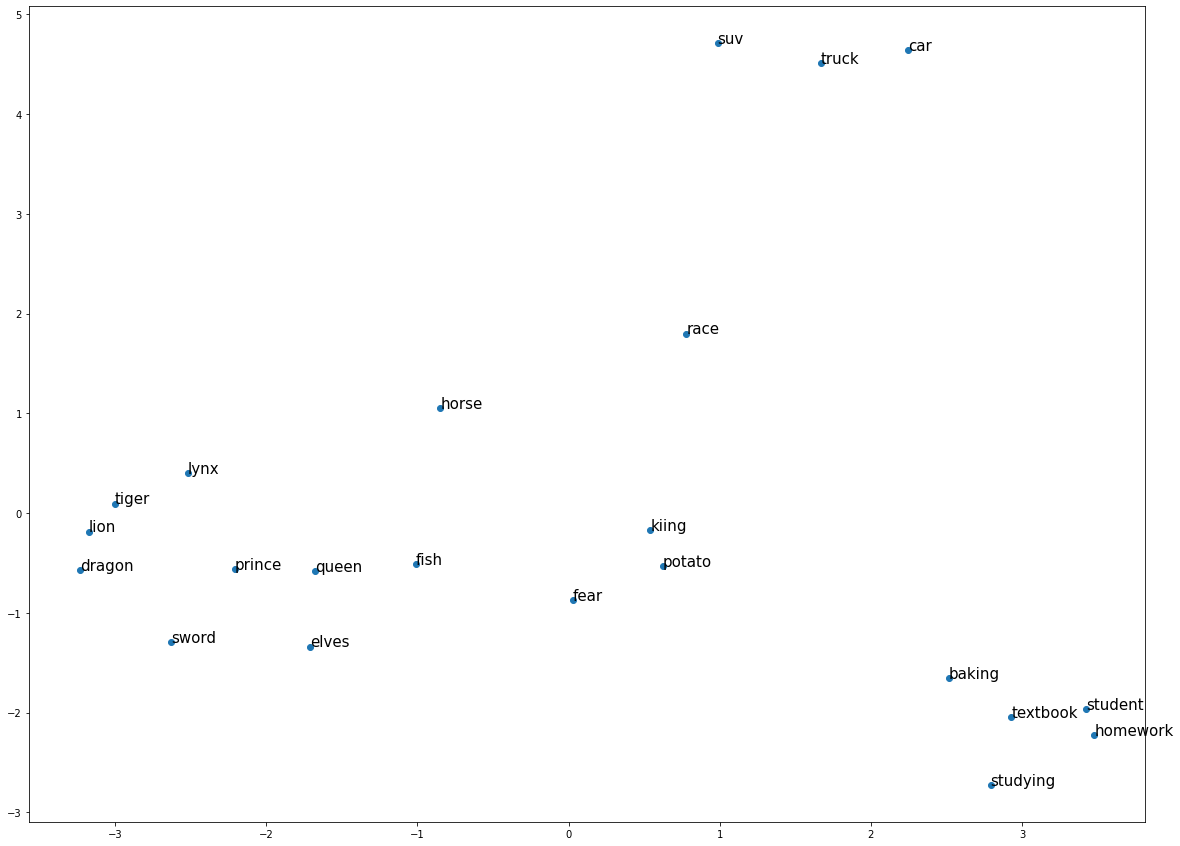

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

# plot the catter plot of where the words will be
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:,1])

# for each word and coordinate pair: draw the text on the plot
for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size=15)

# show the plot
plt.show()

In [43]:
# Most popular word embeddings today is 'Berts' or 'Elmo'?